In [38]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

LL = leagueleaders.LeagueLeaders()
L_LL = LL.get_data_frames()
df_LL=L_LL[0]

from nba_api.stats.endpoints import playergamelog
import pandas as pd

#Call the API endpoint passing in lebron's ID & which season 
gamelog_KD = playergamelog.PlayerGameLog(player_id='201142', season=2020)

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
KD_games_20 = gamelog_KD.get_data_frames()
KD_games_20_play=KD_games_20[0]

#Call the API endpoint passing in lebron's ID & which season 
gamelog_KW = playergamelog.PlayerGameLog(player_id='202695', season=2020)

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
KW_games_20 = gamelog_KW.get_data_frames()
KW_games_20_play=KW_games_20[0]


#Call the API endpoint passing in lebron's ID & which season 
gamelog_LBJ = playergamelog.PlayerGameLog(player_id='2544', season=2020)

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
LBJ_games_20 = gamelog_LBJ.get_data_frames()
LBJ_games_20_play=LBJ_games_20[0]

In [39]:
LBJ=LBJ_games_20_play.loc[:,['FG3A']]
LBJ.columns=['Lebron James']
KW=KW_games_20_play.loc[:,['FG3A']]
KW.columns=['Kawhi Leonard']
KD=KD_games_20_play.loc[:,['FG3A']]
KD.columns=['Kevin Durant']
SC_C = LBJ["Lebron James"]
BB_B = KW["Kawhi Leonard"]
anov_a = KD.join(SC_C)
anov_b = anov_a.join(BB_B)
# fix it wit kaggle

In [40]:
anov_b.describe()


,Kevin Durant,Lebron James,Kawhi Leonard
count,12.000000,12.000000,12.000000
mean,6.083333,6.500000,4.166667
std,1.975225,1.977142,1.800673
min,2.000000,3.000000,2.000000
25%,4.750000,5.750000,3.000000
50%,7.000000,6.500000,4.000000
75%,7.000000,7.250000,5.000000
max,9.000000,10.000000,9.000000


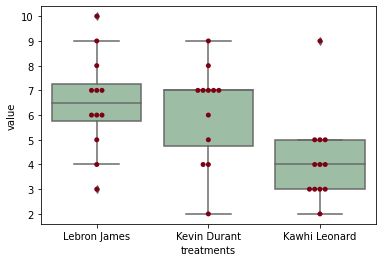

In [41]:

df_melt = pd.melt(anov_b.reset_index(), id_vars=['index'], value_vars=['Lebron James', 'Kevin Durant', 'Kawhi Leonard'])
df_melt.columns = ['index', 'treatments', 'value']
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x= 'treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [42]:


# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),37.166667,2.0,5.043866,0.012264
Residual,121.583333,33.0,NaN,NaN


In [43]:
df_LL.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [44]:
df_LL.loc[0:5, ['PLAYER','MIN','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB']]

,PLAYER,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB
0,Stephen Curry,515,137,304,0.451,62,167,0.371,87,93,0.935,10
1,Damian Lillard,507,119,270,0.441,52,141,0.369,104,110,0.945,4
2,LeBron James,521,141,292,0.483,42,106,0.396,66,91,0.725,12
3,Zach LaVine,498,130,261,0.498,48,124,0.387,75,87,0.862,4
4,Giannis Antetokounmpo,448,140,260,0.538,21,68,0.309,77,132,0.583,23
5,Kevin Durant,435,125,234,0.534,34,73,0.466,91,105,0.867,5


In [32]:
LBJ_games_20_play.loc[:, ['MIN','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB']]

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB
0,38,13,25,0.520,6,10,0.600,2,2,1.000,1
1,38,6,16,0.375,2,7,0.286,5,8,0.625,0
2,31,6,11,0.545,2,6,0.333,7,7,1.000,1
3,27,9,20,0.450,5,8,0.625,3,4,0.750,0
4,29,10,20,0.500,4,9,0.444,2,4,0.500,1
5,30,7,15,0.467,1,6,0.167,3,6,0.500,1
6,34,11,21,0.524,0,5,0.000,6,8,0.750,0
7,35,8,15,0.533,4,7,0.571,7,11,0.636,0
8,34,11,20,0.550,1,4,0.250,3,3,1.000,2
9,32,9,16,0.563,3,6,0.500,1,3,0.333,0
